Parte 1:
- Exploração inicial dos dados das ações brasileiras na B3.
- Criação de uma aba para interação com o ChatGPT para tabular informações como segmento, idade das empresas e faixa etária.
- Análise dos dados principais, incluindo variação percentual, valor inicial, variação em reais e resultados para diferentes períodos.


Parte 2:
- Cálculo de estatísticas básicas como máximo, mínimo, média, maiores aumentos e maiores quedas no dia.
- Análise da variação por segmento, resultado e faixa etária, com uso de gráficos de coluna, cascata e pizza. [no repositório também é possível ver as mesmas análises feitas num arquivo do Google Sheets]

Parte 3:
- Uso da biblioteca Matplotlib para criar gráficos de velas (Candlestick) e integração com Plotly para interatividade das ações PETR4 e AAPL.

Parte 4:
- Aplicação de técnicas de machine learning com a biblioteca Prophet para prever séries temporais de ações do Banco do Brasil no período de 2020 a 2023.


---

# Parte 1

#Importação e datasets

In [ ]:
!pip install mplfinance
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import mplfinance as mpf
import yfinance as yf
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from prophet import Prophet #faz previsões em séries temporais

###Datasets
* acoes_pura
* acoes_subiu
* analise_saldo
* analise_segmento
* analise_idade
* petr
* aapl
* bb
<br><br>

###Abas
* acoes
* total_acoes
* ticker
* chatgpt




In [ ]:
# carregar dataset usando url raw
acoes_pura = 'https://github.com/JoiceO/python/blob/9b7597905c505cab4227d4945f4af405d8238c93/Imers%C3%A3o%20Python%20Do%20Excel%20%C3%A0%20An%C3%A1lise%20de%20Dados/02_acoes%20pura.xlsx?raw=true'

In [ ]:
acoes = pd.read_excel(acoes_pura, sheet_name="Principal")
acoes

,Ativo,Data,Último (R$),Var. Dia (%),Var. Sem. (%),Var. Mês (%),Var. Ano (%),Var. 12M (%),Val. Mín,Val. Máx,Volume
0,USIM5,2024-01-26,9.50,5.20,11.76,2.26,2.26,15.97,9.18,9.56,"319,16 M"
1,CMIN3,2024-01-26,6.82,2.40,2.40,-12.11,-12.11,50.56,6.66,6.86,"32,65 M"
2,PETR3,2024-01-26,41.96,2.19,7.73,7.64,7.64,77.55,40.81,42.34,"436,69 M"
3,SUZB3,2024-01-26,52.91,2.04,2.14,-4.89,-4.89,18.85,51.89,53.17,"162,55 M"
4,CPFE3,2024-01-26,37.10,2.03,2.49,-3.66,-3.66,20.70,36.37,37.32,"73,42 M"
...,...,...,...,...,...,...,...,...,...,...,...
76,CRFB3,2024-01-26,10.71,-2.45,-9.47,-13.98,-13.98,-32.72,10.70,11.08,"38,19 M"
77,BHIA3,2024-01-26,8.70,-2.46,-6.95,-23.55,-23.55,-85.74,8.67,8.95,"27,54 M"
78,RENT3,2024-01-26,56.24,-3.63,-6.41,-11.57,-11.57,-2.77,56.04,58.90,"624,74 M"
79,CVCB3,2024-01-26,3.07,-4.36,-5.54,-12.29,-12.29,-36.83,3.05,3.23,"101,46 M"


In [ ]:
total_acoes = pd.read_excel(acoes_pura, sheet_name="Total_de_acoes")
total_acoes

,Código,Qtde. Teórica
0,RRRP3,235665566.00
1,ALOS3,532616595.00
2,ALPA4,176733968.00
3,ABEV3,4394245879.00
4,ARZZ3,62305891.00
...,...,...
84,VBBR3,1114412532.00
85,WEGE3,1481593024.00
86,YDUQ3,289347914.00
87,Quantidade Teórica Total,96372098181.00


In [ ]:
ticker = pd.read_excel(acoes_pura, sheet_name="Ticker")
ticker

,Ticker,Nome
0,MGLU3,Magazine Luiza
1,HAPV3,Hapvida
2,PETR4,Petrobras
3,B3SA3,B3
4,USIM5,Usiminas
...,...,...
530,TKNO3,Tekno
531,COCE6,Coelce
532,MGEL3,Mangels
533,CTSA8,Santanense


Criação da aba "chatGPT", que com apoio de IA, trouxe  
```
nome da empresa,
segmento,
idade da empresa,
faixa etária
```


In [ ]:
chatgpt = pd.read_excel(acoes_pura, sheet_name="chatGPT")
chatgpt

,Nome,segmento,idade da empresa,faixa etária
0,Usiminas,Siderurgia,59 anos,Entre 50 e 100 anos
1,CSN Mineração,Mineração,6 anos,Menos de 50 anos
2,Petrobras,Petróleo e Gás,69 anos,Entre 50 e 100 anos
3,Suzano,Papel e Celulose,97 anos,Mais de 100 anos
4,CPFL Energia,Energia,109 anos,Mais de 100 anos
...,...,...,...,...
73,Casas Bahia,Varejo,69 anos,Entre 50 e 100 anos
74,Localiza,Aluguel de Carros,48 anos,Entre 50 e 100 anos
75,CVC,Turismo,50 anos,Entre 50 e 100 anos
76,GOL,Transporte Aéreo,20 anos,Menos de 50 anos


In [ ]:
acoes = acoes[['Ativo', 'Data', 'Último (R$)', 'Var. Dia (%)']].copy()
acoes

,Ativo,Data,Último (R$),Var. Dia (%)
0,USIM5,2024-01-26,9.50,5.20
1,CMIN3,2024-01-26,6.82,2.40
2,PETR3,2024-01-26,41.96,2.19
3,SUZB3,2024-01-26,52.91,2.04
4,CPFE3,2024-01-26,37.10,2.03
...,...,...,...,...
76,CRFB3,2024-01-26,10.71,-2.45
77,BHIA3,2024-01-26,8.70,-2.46
78,RENT3,2024-01-26,56.24,-3.63
79,CVCB3,2024-01-26,3.07,-4.36


##Limpeza

In [ ]:
#renomeando colunas
acoes = acoes.rename(columns={'Último (R$)':'valor_final', 'Var. Dia (%)':'var_dia_pct'}).copy()
acoes

,Ativo,Data,valor_final,var_dia_pct
0,USIM5,2024-01-26,9.50,5.20
1,CMIN3,2024-01-26,6.82,2.40
2,PETR3,2024-01-26,41.96,2.19
3,SUZB3,2024-01-26,52.91,2.04
4,CPFE3,2024-01-26,37.10,2.03
...,...,...,...,...
76,CRFB3,2024-01-26,10.71,-2.45
77,BHIA3,2024-01-26,8.70,-2.46
78,RENT3,2024-01-26,56.24,-3.63
79,CVCB3,2024-01-26,3.07,-4.36


In [ ]:
#calculando a variação percentual
acoes['Var_pct'] = acoes['var_dia_pct'] / 100
acoes['valor_inicial'] = acoes['valor_final'] / (acoes['Var_pct'] + 1)
acoes

,Ativo,Data,valor_final,var_dia_pct,Var_pct,valor_inicial
0,USIM5,2024-01-26,9.50,5.20,0.05,9.03
1,CMIN3,2024-01-26,6.82,2.40,0.02,6.66
2,PETR3,2024-01-26,41.96,2.19,0.02,41.06
3,SUZB3,2024-01-26,52.91,2.04,0.02,51.85
4,CPFE3,2024-01-26,37.10,2.03,0.02,36.36
...,...,...,...,...,...,...
76,CRFB3,2024-01-26,10.71,-2.45,-0.02,10.98
77,BHIA3,2024-01-26,8.70,-2.46,-0.02,8.92
78,RENT3,2024-01-26,56.24,-3.63,-0.04,58.36
79,CVCB3,2024-01-26,3.07,-4.36,-0.04,3.21


In [ ]:
acoes = acoes.merge(total_acoes, left_on='Ativo', right_on='Código', how='left')
acoes

,Ativo,Data,valor_final,var_dia_pct,Var_pct,valor_inicial,Código,Qtde. Teórica
0,USIM5,2024-01-26,9.50,5.20,0.05,9.03,USIM5,515117391.00
1,CMIN3,2024-01-26,6.82,2.40,0.02,6.66,CMIN3,1110559345.00
2,PETR3,2024-01-26,41.96,2.19,0.02,41.06,PETR3,2379877655.00
3,SUZB3,2024-01-26,52.91,2.04,0.02,51.85,SUZB3,683452836.00
4,CPFE3,2024-01-26,37.10,2.03,0.02,36.36,CPFE3,187732538.00
...,...,...,...,...,...,...,...,...
76,CRFB3,2024-01-26,10.71,-2.45,-0.02,10.98,CRFB3,533990587.00
77,BHIA3,2024-01-26,8.70,-2.46,-0.02,8.92,BHIA3,94843047.00
78,RENT3,2024-01-26,56.24,-3.63,-0.04,58.36,RENT3,853202347.00
79,CVCB3,2024-01-26,3.07,-4.36,-0.04,3.21,CVCB3,525582771.00


In [ ]:
acoes = acoes.drop(columns=['Código'])
acoes

,Ativo,Data,valor_final,var_dia_pct,Var_pct,valor_inicial,Qtde. Teórica
0,USIM5,2024-01-26,9.50,5.20,0.05,9.03,515117391.00
1,CMIN3,2024-01-26,6.82,2.40,0.02,6.66,1110559345.00
2,PETR3,2024-01-26,41.96,2.19,0.02,41.06,2379877655.00
3,SUZB3,2024-01-26,52.91,2.04,0.02,51.85,683452836.00
4,CPFE3,2024-01-26,37.10,2.03,0.02,36.36,187732538.00
...,...,...,...,...,...,...,...
76,CRFB3,2024-01-26,10.71,-2.45,-0.02,10.98,533990587.00
77,BHIA3,2024-01-26,8.70,-2.46,-0.02,8.92,94843047.00
78,RENT3,2024-01-26,56.24,-3.63,-0.04,58.36,853202347.00
79,CVCB3,2024-01-26,3.07,-4.36,-0.04,3.21,525582771.00


In [ ]:
acoes['Variacao_rs'] = (acoes['valor_final'] - acoes['valor_inicial'])*acoes['Qtde. Teórica']
acoes

,Ativo,Data,valor_final,var_dia_pct,Var_pct,valor_inicial,Qtde. Teórica,Variacao_rs
0,USIM5,2024-01-26,9.50,5.20,0.05,9.03,515117391.00,241889725.43
1,CMIN3,2024-01-26,6.82,2.40,0.02,6.66,1110559345.00,177515970.30
2,PETR3,2024-01-26,41.96,2.19,0.02,41.06,2379877655.00,2140059393.53
3,SUZB3,2024-01-26,52.91,2.04,0.02,51.85,683452836.00,722946282.71
4,CPFE3,2024-01-26,37.10,2.03,0.02,36.36,187732538.00,138573955.06
...,...,...,...,...,...,...,...,...
76,CRFB3,2024-01-26,10.71,-2.45,-0.02,10.98,533990587.00,-143635530.57
77,BHIA3,2024-01-26,8.70,-2.46,-0.02,8.92,94843047.00,-20810240.84
78,RENT3,2024-01-26,56.24,-3.63,-0.04,58.36,853202347.00,-1807432634.46
79,CVCB3,2024-01-26,3.07,-4.36,-0.04,3.21,525582771.00,-73557408.06


In [ ]:
#ajustando as colunas para ficarem float com 2 casas decimais
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
#transformando em inteiro
acoes['Qtde. Teórica'] = acoes['Qtde. Teórica'].astype(int)
acoes

,Ativo,Data,valor_final,var_dia_pct,Var_pct,valor_inicial,Qtde. Teórica,Variacao_rs
0,USIM5,2024-01-26,9.50,5.20,0.05,9.03,515117391,241889725.43
1,CMIN3,2024-01-26,6.82,2.40,0.02,6.66,1110559345,177515970.30
2,PETR3,2024-01-26,41.96,2.19,0.02,41.06,2379877655,2140059393.53
3,SUZB3,2024-01-26,52.91,2.04,0.02,51.85,683452836,722946282.71
4,CPFE3,2024-01-26,37.10,2.03,0.02,36.36,187732538,138573955.06
...,...,...,...,...,...,...,...,...
76,CRFB3,2024-01-26,10.71,-2.45,-0.02,10.98,533990587,-143635530.57
77,BHIA3,2024-01-26,8.70,-2.46,-0.02,8.92,94843047,-20810240.84
78,RENT3,2024-01-26,56.24,-3.63,-0.04,58.36,853202347,-1807432634.46
79,CVCB3,2024-01-26,3.07,-4.36,-0.04,3.21,525582771,-73557408.06


In [ ]:
acoes = acoes.rename(columns={'Qtde. Teórica':'Qtd_teorica'}).copy()
acoes

,Ativo,Data,valor_final,var_dia_pct,Var_pct,valor_inicial,Qtd_teorica,Variacao_rs
0,USIM5,2024-01-26,9.50,5.20,0.05,9.03,515117391,241889725.43
1,CMIN3,2024-01-26,6.82,2.40,0.02,6.66,1110559345,177515970.30
2,PETR3,2024-01-26,41.96,2.19,0.02,41.06,2379877655,2140059393.53
3,SUZB3,2024-01-26,52.91,2.04,0.02,51.85,683452836,722946282.71
4,CPFE3,2024-01-26,37.10,2.03,0.02,36.36,187732538,138573955.06
...,...,...,...,...,...,...,...,...
76,CRFB3,2024-01-26,10.71,-2.45,-0.02,10.98,533990587,-143635530.57
77,BHIA3,2024-01-26,8.70,-2.46,-0.02,8.92,94843047,-20810240.84
78,RENT3,2024-01-26,56.24,-3.63,-0.04,58.36,853202347,-1807432634.46
79,CVCB3,2024-01-26,3.07,-4.36,-0.04,3.21,525582771,-73557408.06


In [ ]:
#identificação das ações que subiram, desceram ou ficaram estáveis no final do dia
acoes['Resultado'] = acoes['Variacao_rs'].apply(lambda x: 'Subiu' if x > 0 else ('Desceu' if x < 0 else 'Estável'))
acoes

,Ativo,Data,valor_final,var_dia_pct,Var_pct,valor_inicial,Qtd_teorica,Variacao_rs,Resultado
0,USIM5,2024-01-26,9.50,5.20,0.05,9.03,515117391,241889725.43,Subiu
1,CMIN3,2024-01-26,6.82,2.40,0.02,6.66,1110559345,177515970.30,Subiu
2,PETR3,2024-01-26,41.96,2.19,0.02,41.06,2379877655,2140059393.53,Subiu
3,SUZB3,2024-01-26,52.91,2.04,0.02,51.85,683452836,722946282.71,Subiu
4,CPFE3,2024-01-26,37.10,2.03,0.02,36.36,187732538,138573955.06,Subiu
...,...,...,...,...,...,...,...,...,...
76,CRFB3,2024-01-26,10.71,-2.45,-0.02,10.98,533990587,-143635530.57,Desceu
77,BHIA3,2024-01-26,8.70,-2.46,-0.02,8.92,94843047,-20810240.84,Desceu
78,RENT3,2024-01-26,56.24,-3.63,-0.04,58.36,853202347,-1807432634.46,Desceu
79,CVCB3,2024-01-26,3.07,-4.36,-0.04,3.21,525582771,-73557408.06,Desceu


In [ ]:
acoes = acoes.merge(ticker, left_on='Ativo', right_on='Ticker', how='left')
acoes = acoes.drop(columns=['Ticker'])
acoes

,Ativo,Data,valor_final,var_dia_pct,Var_pct,valor_inicial,Qtd_teorica,Variacao_rs,Resultado,Nome
0,USIM5,2024-01-26,9.50,5.20,0.05,9.03,515117391,241889725.43,Subiu,Usiminas
1,CMIN3,2024-01-26,6.82,2.40,0.02,6.66,1110559345,177515970.30,Subiu,CSN Mineração
2,PETR3,2024-01-26,41.96,2.19,0.02,41.06,2379877655,2140059393.53,Subiu,Petrobras
3,SUZB3,2024-01-26,52.91,2.04,0.02,51.85,683452836,722946282.71,Subiu,Suzano
4,CPFE3,2024-01-26,37.10,2.03,0.02,36.36,187732538,138573955.06,Subiu,CPFL Energia
...,...,...,...,...,...,...,...,...,...,...
76,CRFB3,2024-01-26,10.71,-2.45,-0.02,10.98,533990587,-143635530.57,Desceu,Carrefour Brasil
77,BHIA3,2024-01-26,8.70,-2.46,-0.02,8.92,94843047,-20810240.84,Desceu,Casas Bahia
78,RENT3,2024-01-26,56.24,-3.63,-0.04,58.36,853202347,-1807432634.46,Desceu,Localiza
79,CVCB3,2024-01-26,3.07,-4.36,-0.04,3.21,525582771,-73557408.06,Desceu,CVC


In [ ]:
##mesclar colunas de chatgpt para acoes
acoes = pd.concat([acoes, chatgpt], axis=1)
acoes

,Ativo,Data,valor_final,var_dia_pct,Var_pct,valor_inicial,Qtd_teorica,Variacao_rs,Resultado,Nome,Nome,segmento,idade da empresa,faixa etária
0,USIM5,2024-01-26,9.50,5.20,0.05,9.03,515117391,241889725.43,Subiu,Usiminas,Usiminas,Siderurgia,59 anos,Entre 50 e 100 anos
1,CMIN3,2024-01-26,6.82,2.40,0.02,6.66,1110559345,177515970.30,Subiu,CSN Mineração,CSN Mineração,Mineração,6 anos,Menos de 50 anos
2,PETR3,2024-01-26,41.96,2.19,0.02,41.06,2379877655,2140059393.53,Subiu,Petrobras,Petrobras,Petróleo e Gás,69 anos,Entre 50 e 100 anos
3,SUZB3,2024-01-26,52.91,2.04,0.02,51.85,683452836,722946282.71,Subiu,Suzano,Suzano,Papel e Celulose,97 anos,Mais de 100 anos
4,CPFE3,2024-01-26,37.10,2.03,0.02,36.36,187732538,138573955.06,Subiu,CPFL Energia,CPFL Energia,Energia,109 anos,Mais de 100 anos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,CRFB3,2024-01-26,10.71,-2.45,-0.02,10.98,533990587,-143635530.57,Desceu,Carrefour Brasil,GOL,Transporte Aéreo,20 anos,Menos de 50 anos
77,BHIA3,2024-01-26,8.70,-2.46,-0.02,8.92,94843047,-20810240.84,Desceu,Casas Bahia,Gerdau,Siderurgia,120 anos,Mais de 100 anos
78,RENT3,2024-01-26,56.24,-3.63,-0.04,58.36,853202347,-1807432634.46,Desceu,Localiza,NaN,NaN,NaN,NaN
79,CVCB3,2024-01-26,3.07,-4.36,-0.04,3.21,525582771,-73557408.06,Desceu,CVC,NaN,NaN,NaN,NaN



---

#Parte 2

#Análise descritiva

In [ ]:
# Calculando o maior valor
maior = acoes['Variacao_rs'].max()

# Calculando o menor valor
menor = acoes['Variacao_rs'].min()

# Calculando a média
media = acoes['Variacao_rs'].mean()

# Calculando a média de quem subiu
media_subiu = acoes[acoes['Resultado'] == 'Subiu']['Variacao_rs'].mean()

# Calculando a média de quem desceu
media_desceu = acoes[acoes['Resultado'] == 'Desceu']['Variacao_rs'].mean()

# Imprimindo os resultados
print(f"Maior\tR$ {maior:,.2f}")
print(f"Menor\tR$ {menor:,.2f}")
print(f"Média\tR$ {media:,.2f}")
print(f"Média de quem subiu\tR$ {media_subiu:,.2f}")
print(f"Média de quem desceu\tR$ {media_desceu:,.2f}")

Maior	R$ 4,762,926,995.25
Menor	R$ -1,807,432,634.46
Média	R$ 165,190,210.48
Média de quem subiu	R$ 448,164,250.23
Média de quem desceu	R$ -181,109,141.75


In [ ]:
acoes_subiu = acoes[acoes['Resultado'] == 'Subiu']
acoes_subiu

,Ativo,Data,valor_final,var_dia_pct,Var_pct,valor_inicial,Qtd_teorica,Variacao_rs,Resultado,Nome,Nome,segmento,idade da empresa,faixa etária
0,USIM5,2024-01-26,9.50,5.20,0.05,9.03,515117391,241889725.43,Subiu,Usiminas,Usiminas,Siderurgia,59 anos,Entre 50 e 100 anos
1,CMIN3,2024-01-26,6.82,2.40,0.02,6.66,1110559345,177515970.30,Subiu,CSN Mineração,CSN Mineração,Mineração,6 anos,Menos de 50 anos
2,PETR3,2024-01-26,41.96,2.19,0.02,41.06,2379877655,2140059393.53,Subiu,Petrobras,Petrobras,Petróleo e Gás,69 anos,Entre 50 e 100 anos
3,SUZB3,2024-01-26,52.91,2.04,0.02,51.85,683452836,722946282.71,Subiu,Suzano,Suzano,Papel e Celulose,97 anos,Mais de 100 anos
4,CPFE3,2024-01-26,37.10,2.03,0.02,36.36,187732538,138573955.06,Subiu,CPFL Energia,CPFL Energia,Energia,109 anos,Mais de 100 anos
5,PRIO3,2024-01-26,45.69,1.98,0.02,44.80,800010734,709687498.18,Subiu,PetroRio,PetroRio,Petróleo e Gás,10 anos,Menos de 50 anos
6,PETR4,2024-01-26,39.96,1.73,0.02,39.28,4566445852,3103136291.22,Subiu,Petrobras,Vale,Mineração,79 anos,Entre 50 e 100 anos
7,VALE3,2024-01-26,69.50,1.66,0.02,68.37,4196924316,4762926995.25,Subiu,Vale,Multiplan,Shopping Centers,49 anos,Entre 50 e 100 anos
8,MULT3,2024-01-26,28.19,1.58,0.02,27.75,268505432,117732680.08,Subiu,Multiplan,Itaú Unibanco,Banco,13 anos,Menos de 50 anos
9,ITUB4,2024-01-26,32.81,1.48,0.01,32.33,4801593832,2297591984.33,Subiu,Itaú Unibanco,Rede D'Or,Saúde,45 anos,Entre 50 e 100 anos


## análise por saldo

In [ ]:
analise_saldo = acoes.groupby('Resultado')['Variacao_rs'].sum().reset_index()
analise_saldo

,Resultado,Variacao_rs
0,Desceu,-6338819961.32
1,Estável,0.00
2,Subiu,19719227010.14


In [ ]:
fig = px.bar(analise_saldo, x='Resultado', y='Variacao_rs', text='Variacao_rs', title='Variação Reais por Resultado')
fig.update_traces(texttemplate='%{text:,.2f}', textposition='outside')
fig.show()

##análise por segmento

In [ ]:
analise_segmento = acoes_subiu.groupby('segmento')['Variacao_rs'].sum().reset_index()
analise_segmento

,segmento,Variacao_rs
0,Alimentos,967290012.23
1,Banco,532608467.05
2,Bebidas,32069789.50
3,Calçados,37525872.38
4,Conglomerado,46201006.00
5,Construção Civil,388705223.96
6,Distribuição,72295838.99
7,Educação,143220991.46
8,Energia,417995118.04
9,Holding,103972807.37


In [ ]:
# Ordenação dos segmentos por valor de variação em reais
analise_segmento_sorted = analise_segmento.sort_values(by='Variacao_rs', ascending=False)

# Agrupamento dos segmentos menos relevantes
top_n = 10  # nº de segmentos que desejo manter separados
top_segmentos = analise_segmento_sorted.head(top_n)
outros_segmentos = analise_segmento_sorted.iloc[top_n:]
outros_row = pd.DataFrame({
    'segmento': ['Outros'],
    'Variacao_R$': [outros_segmentos['Variacao_rs'].sum()]
})
analise_segmento_agrupado = pd.concat([top_segmentos, outros_row])

#gráfico de pizza
fig = px.pie(analise_segmento_agrupado, names='segmento', values='Variacao_rs',
             title='Variação em Reais dos top 10 segmentos',
             labels={'segmento': 'Segmento', 'Variacao_rs': 'Variação em Reais'})
# Inclusão de rótulos e explosão dos segmentos maiores
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

##análise por faixa etária

In [ ]:
analise_idade = acoes.groupby('faixa etária')['Variacao_rs'].sum().reset_index()
analise_idade

,faixa etária,Variacao_rs
0,Entre 50 e 100 anos,11394753202.27
1,Mais de 100 anos,1828351636.76
2,Menos de 50 anos,2141285454.93


In [ ]:
fig = px.bar(analise_idade, x='faixa etária', y='Variacao_rs', text='Variacao_rs', title='Variação Reais por Categoria de Idade')
fig.update_traces(texttemplate='%{text:,.2f}', textposition='outside')
fig.show()



---

#Parte 3
#Raspagem para avaliar ações

#PETR4

In [ ]:
#ações da Petrobras em 2023
petr = yf.download('PETR4.SA', start='2023-01-01', end='2023-12-31')
petr

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-02,23.54,23.81,22.80,22.92,17.71,78424700
2023-01-03,22.94,23.10,22.13,22.34,17.26,96750300
2023-01-04,21.96,23.59,21.83,23.05,17.81,129504000
2023-01-05,23.34,24.04,23.15,23.88,18.45,73886000
2023-01-06,23.94,24.32,23.55,23.74,18.34,51851500
...,...,...,...,...,...,...
2023-12-21,36.67,36.68,36.07,36.39,36.39,30511900
2023-12-22,36.50,36.80,36.37,36.74,36.74,31234700
2023-12-26,36.86,37.37,36.83,37.33,37.33,23466800


In [ ]:
#renomeando
petr.columns = ['Abertura', 'Maximo', 'Minimo', 'Fechamento', 'Fech_Ajust', 'Volume']

petr = petr.rename_axis('Data')
petr

,Abertura,Maximo,Minimo,Fechamento,Fech_Ajust,Volume
Data,,,,,,
2023-01-02,23.54,23.81,22.80,22.92,17.71,78424700
2023-01-03,22.94,23.10,22.13,22.34,17.26,96750300
2023-01-04,21.96,23.59,21.83,23.05,17.81,129504000
2023-01-05,23.34,24.04,23.15,23.88,18.45,73886000
2023-01-06,23.94,24.32,23.55,23.74,18.34,51851500
...,...,...,...,...,...,...
2023-12-21,36.67,36.68,36.07,36.39,36.39,30511900
2023-12-22,36.50,36.80,36.37,36.74,36.74,31234700
2023-12-26,36.86,37.37,36.83,37.33,37.33,23466800


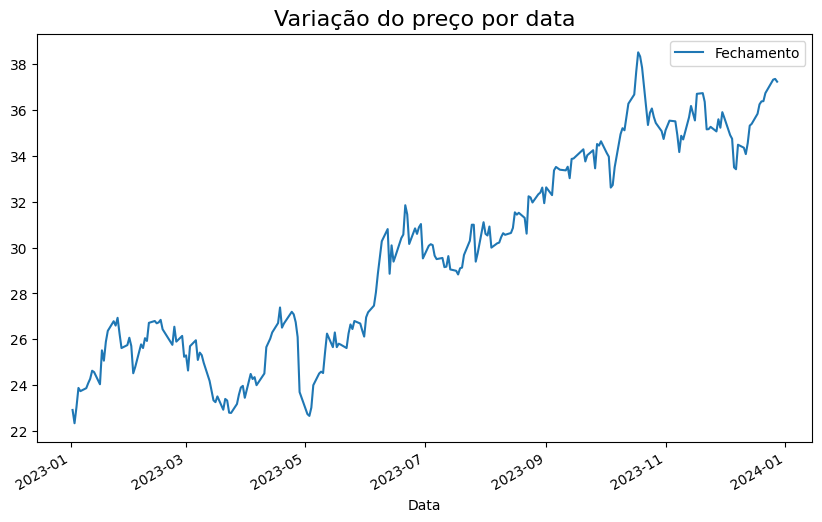

In [ ]:
petr['Fechamento'].plot(figsize=(10,6))
plt.title('Variação do preço por data', fontsize=16)
plt.legend(['Fechamento'])

In [ ]:
#reorganizando as datas com matplotlib para plotar gráfico de vela
petr= petr.head(60).copy()

#convertendo o índice em uma coluna de data
petr['Data'] = petr.index

#convertendo as datas para o formato numérico de matplotlib -> para plotar as datas corretamente no gráfico
petr['Data'] = petr['Data'].apply(mdates.date2num)

petr

,Abertura,Maximo,Minimo,Fechamento,Fech_Ajust,Volume,Data
Data,,,,,,,
2023-01-02,23.54,23.81,22.80,22.92,17.71,78424700,19359.00
2023-01-03,22.94,23.10,22.13,22.34,17.26,96750300,19360.00
2023-01-04,21.96,23.59,21.83,23.05,17.81,129504000,19361.00
2023-01-05,23.34,24.04,23.15,23.88,18.45,73886000,19362.00
2023-01-06,23.94,24.32,23.55,23.74,18.34,51851500,19363.00
2023-01-09,23.50,24.00,23.25,23.87,18.44,46385200,19366.00
2023-01-10,23.95,24.11,23.37,24.09,18.61,52741100,19367.00
2023-01-11,24.15,24.62,24.05,24.28,18.76,53536500,19368.00
2023-01-12,24.29,24.65,24.11,24.63,19.03,58130000,19369.00


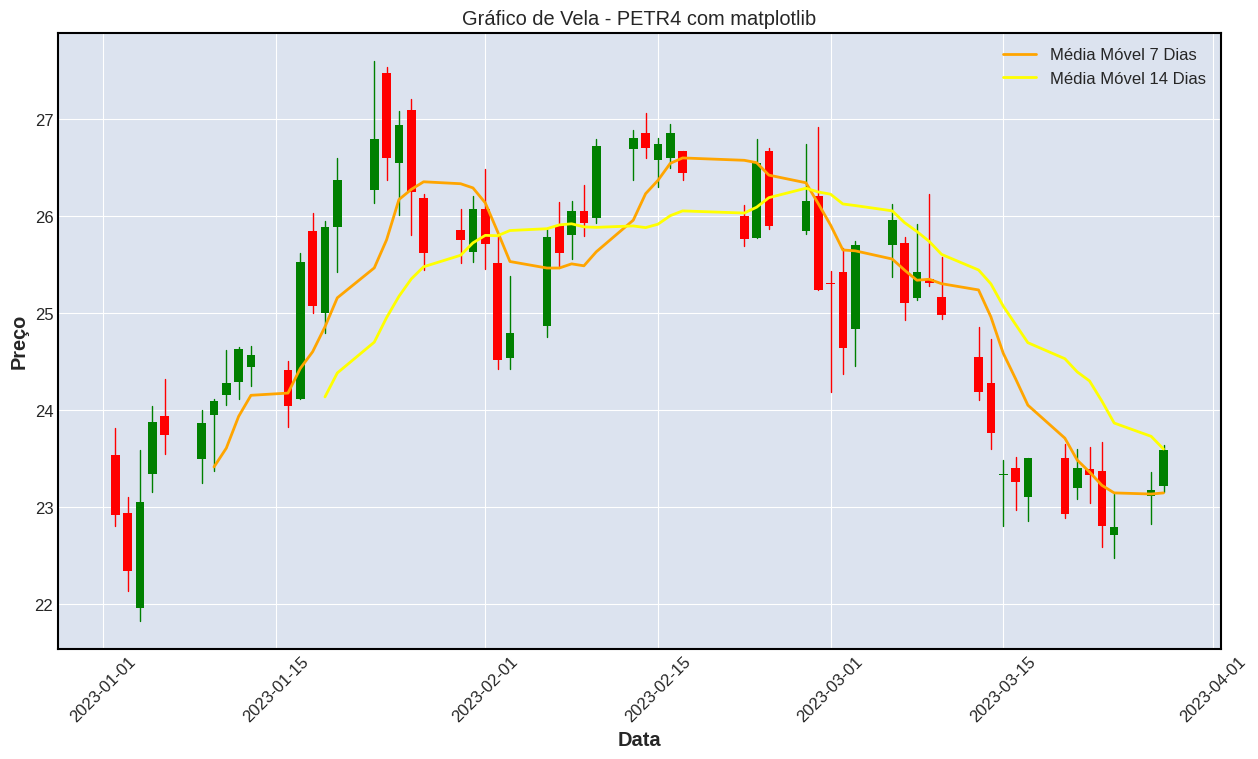

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))

#definir a largura das velas no gráfico
width = 0.7

for i in range(len(petr)):
    # Determinando a cor da vela
    # Se o preço de fechamento for maior que o de abertura, a vela é verde (a ação valorizou nesse dia).
    # Se for menor, a vela é vermelha (a ação desvalorizou).
    if petr['Fechamento'].iloc[i] > petr['Abertura'].iloc[i]:
        color = 'green'
    else:
        color = 'red'

    # Desenhando a linha vertical da vela (mecha)
    # Essa linha mostra os preços máximo (topo da linha) e mínimo (base da linha) do dia.
    # Usamos `ax.plot` para desenhar uma linha vertical.
    # [petr['Data'].iloc[i], petr['Data'].iloc[i]] define o ponto x da linha (a data), e [petr['Mínimo'].iloc[i], petr['Máximo'].iloc[i]] define a altura da linha.
    ax.plot([petr['Data'].iloc[i], petr['Data'].iloc[i]],
            [petr['Minimo'].iloc[i], petr['Maximo'].iloc[i]],
            color=color,
            linewidth=1)

    ax.add_patch(plt.Rectangle((petr['Data'].iloc[i] - width/2, min(petr['Abertura'].iloc[i], petr['Fechamento'].iloc[i])),
                               width,
                               abs(petr['Fechamento'].iloc[i] - petr['Abertura'].iloc[i]),
                               facecolor=color))

petr['MA7'] = petr['Fechamento'].rolling(window=7).mean()
petr['MA14'] = petr['Fechamento'].rolling(window=14).mean()

#plotando as médias móveis
ax.plot(petr['Data'], petr['MA7'], color='orange', label='Média Móvel 7 Dias')
ax.plot(petr['Data'], petr['MA14'], color='yellow', label='Média Móvel 14 Dias')
#adicionando legendas para as médias móveis
ax.legend()

# Formatando o eixo x para mostrar as datas
# Configuramos o formato da data e a rotação para melhor legibilidade
ax.xaxis_date() #O método xaxis_date() é usado para dizer ao Matplotlib que as datas estão sendo usadas no eixo x
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)

# Adicionando título e rótulos para os eixos x e y
plt.title("Gráfico de Vela - PETR4 com matplotlib")
plt.xlabel("Data")
plt.ylabel("Preço")

# Adicionando uma grade para facilitar a visualização dos valores
plt.grid(True)

# Exibindo o gráfico
plt.show()

In [ ]:
# Criando subplots
'''
"Primeiro, criamos uma figura que conterá nossos gráficos usando make_subplots.
Isso nos permite ter múltiplos gráficos em uma única visualização.
Aqui, teremos dois subplots: um para o gráfico de vela e outro para o volume de transações."

'''
fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                    vertical_spacing=0.1,
                    subplot_titles=('Velas', 'Volume Transacionado'),
                    row_width=[0.2, 0.7])

'''
No gráfico de vela, cada uma representa um dia de negociação,
mostrando o preço de abertura, fechamento, máximo e mínimo
'''
# Adicionando o gráfico de vela
fig.add_trace(go.Candlestick(x=petr.index,
                             open=petr['Abertura'],
                             high=petr['Maximo'],
                             low=petr['Minimo'],
                             close=petr['Fechamento'],
                             name='Vela'),
                             row=1, col=1)

# Adicionando as médias móveis ao mesmo subplot para análise de tendências
fig.add_trace(go.Scatter(x=petr.index,
                         y=petr['MA7'],
                         mode='lines',
                         name='MM7 - Média Móvel 7 Dias'),
                         row=1, col=1)

fig.add_trace(go.Scatter(x=petr.index,
                         y=petr['MA14'],
                         mode='lines',
                         name='MM14 - Média Móvel 14 Dias'),
                         row=1, col=1)

#criamos um gráfico de barras para o volume de transações, que nos dá uma ideia da atividade de negociação naquele dia
fig.add_trace(go.Bar(x=petr.index,
                     y=petr['Volume'],
                     name='Volume'),
                     row=2, col=1)

# configuramos o layout da figura, ajustando títulos, formatos de eixo e outras configurações para tornar o gráfico claro e legível
fig.update_layout(yaxis_title='Preço',
                  xaxis_rangeslider_visible=False,  # Desativa o range slider
                  width=1100, height=600)

fig.show()

#AAPL

In [ ]:
#ações da Apple, em 2023
aapl = yf.download('AAPL', start='2023-01-01', end='2023-12-31')
aapl.head(5)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,130.28,130.90,124.17,125.07,124.22,112117500
2023-01-04,126.89,128.66,125.08,126.36,125.50,89113600
2023-01-05,127.13,127.77,124.76,125.02,124.17,80962700
2023-01-06,126.01,130.29,124.89,129.62,128.74,87754700
2023-01-09,130.47,133.41,129.89,130.15,129.26,70790800


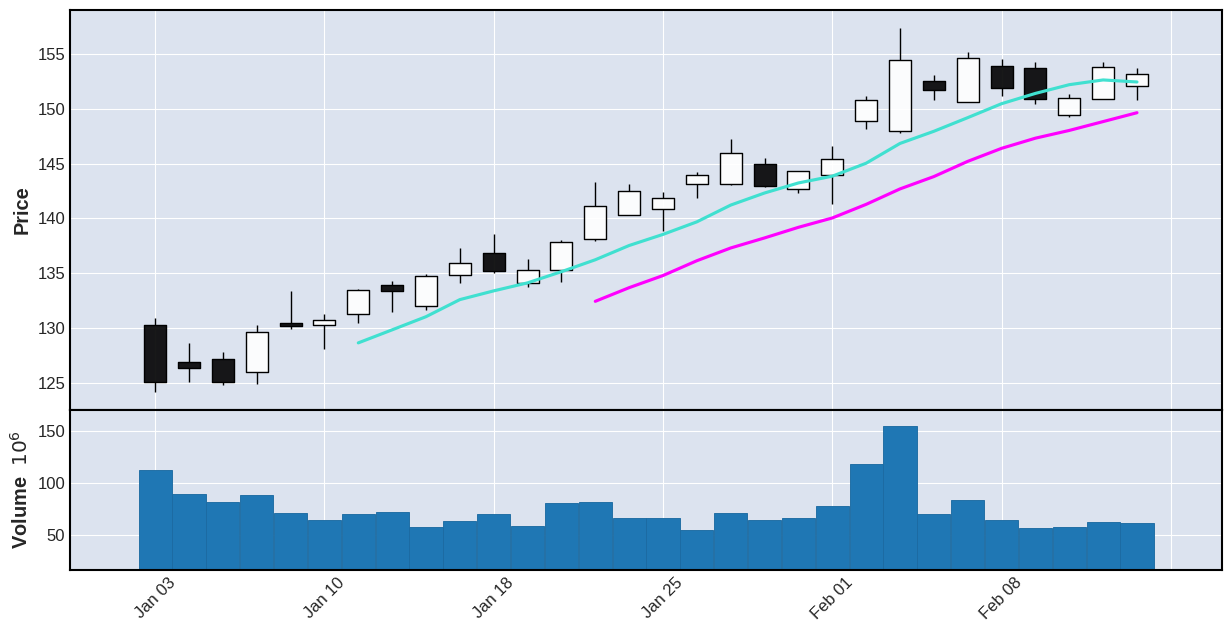

In [ ]:
mpf.plot(aapl.head(30), type='candle', figsize = (16,8), volume=True, mav=(7,14))



---
#Parte 4
#Séries temporais com aprendizado de máquina

#BBAS3

In [ ]:
#avaliando ações do Banco do Brasil de 2020 a 2023
bb = yf.download("JNJ", start="2020-01-01", end="2023-12-31", progress=False)
bb = bb.reset_index()

In [ ]:
bb.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,145.87,146.02,145.08,145.97,130.10,5777000
1,2020-01-03,143.50,145.37,143.00,144.28,128.59,5752400
2,2020-01-06,144.00,144.20,142.85,144.10,128.43,7731300
3,2020-01-07,144.01,145.45,141.38,144.98,129.22,7382900
4,2020-01-08,144.87,145.98,143.70,144.96,129.20,6605800


In [ ]:
#renomeando
bb.columns = ['Data', 'Abertura', 'Maximo', 'Minimo', 'Fechamento', 'Fech_Ajust', 'Volume']
bb.head(5)

,Data,Abertura,Maximo,Minimo,Fechamento,Fech_Ajust,Volume
0,2020-01-02,145.87,146.02,145.08,145.97,130.10,5777000
1,2020-01-03,143.50,145.37,143.00,144.28,128.59,5752400
2,2020-01-06,144.00,144.20,142.85,144.10,128.43,7731300
3,2020-01-07,144.01,145.45,141.38,144.98,129.22,7382900
4,2020-01-08,144.87,145.98,143.70,144.96,129.20,6605800


In [ ]:
#separação em treino (até o final do primeiro semestre de 2023) e teste (segundo semestre de 2023)
bb_treino = bb[bb['Data'] < '2023-07-31']
bb_teste = bb[bb['Data'] >= '2023-07-31']

In [ ]:
# Preparando os dados para o FBProphet
bb_prophet_treino = bb_treino[['Data', 'Fechamento']].rename(columns={'Data': 'ds', 'Fechamento': 'y'})

In [ ]:
# Criar e treinar o modelo com base em semanas e anos e considerar feriados no Brasil
modelo = Prophet(weekly_seasonality=True,
        yearly_seasonality=True,
        daily_seasonality=False)

modelo.add_country_holidays(country_name='BR')

modelo.fit(bb_prophet_treino)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpcfkdoxuc/ofgwg54n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcfkdoxuc/bbwpkiby.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18387', 'data', 'file=/tmp/tmpcfkdoxuc/ofgwg54n.json', 'init=/tmp/tmpcfkdoxuc/bbwpkiby.json', 'output', 'file=/tmp/tmpcfkdoxuc/prophet_modelvonqsoxr/prophet_model-20240405005359.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:53:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:53:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Criar datas futuras para previsão até o final de 2023
futuro = modelo.make_future_dataframe(periods=150)
previsao = modelo.predict(futuro)

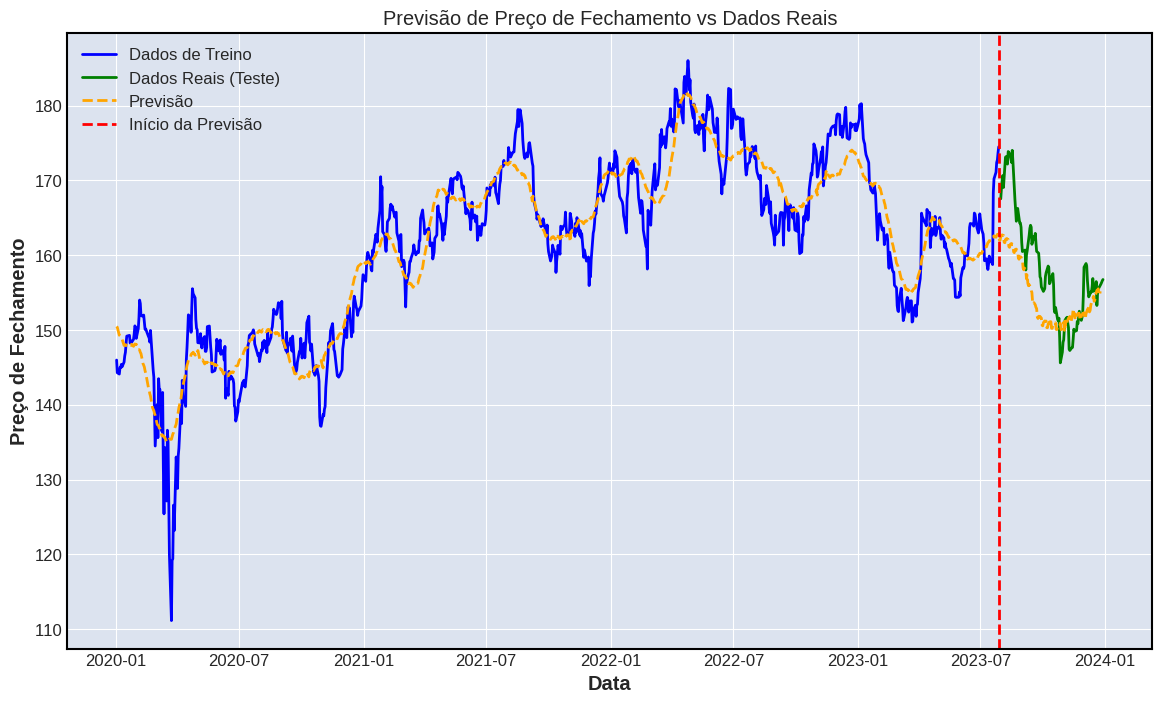

In [ ]:
#plotando dados de treino, teste e previsões
'''
legenda: a linha azul mostra o preço real das ações até julho de 2023,
         a verde mostra os preços reais após essa data,
         e a laranja mostra o que o Prophet previu. A linha vermelha pontilhada marca onde começam as previsões
 '''
plt.figure(figsize=(14, 8))
plt.plot(bb_treino['Data'], bb_treino['Fechamento'], label='Dados de Treino', color='blue')
plt.plot(bb_teste['Data'], bb_teste['Fechamento'], label='Dados Reais (Teste)', color='green')
plt.plot(previsao['ds'], previsao['yhat'], label='Previsão', color='orange', linestyle='--')

plt.axvline(bb_treino['Data'].max(), color='red', linestyle='--', label='Início da Previsão')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.title('Previsão de Preço de Fechamento vs Dados Reais')
plt.legend()
plt.show()